In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Train_Data.csv')

In [3]:
data.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


# checking for missing values

In [4]:
data.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [5]:
data['is_sarcastic'].value_counts()

0    23958
1    20304
Name: is_sarcastic, dtype: int64

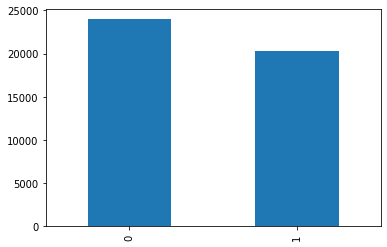

In [6]:
# checking if the dataset is balanced

data['is_sarcastic'].value_counts().plot(kind='bar')

# splitting the data set into independent and targert array variables

In [7]:
x = np.array(data['headline'])

In [8]:
y = np.array(data['is_sarcastic'])

# using tfidf vectorizer

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
X = tf.fit_transform(x)

# splitting the dataset into training and testing

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

# Model building

In [13]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = model.predict(x_test)

In [15]:
print(f'f1 score = {f1_score(y_test, y_pred)}')
print(f'confusion matrix \n = {confusion_matrix(y_test, y_pred)}')
print(f'\naccuracy = {accuracy_score(y_test,y_pred)}')

f1 score = 0.9276657408525542
confusion matrix 
 = [[4413  298]
 [ 301 3841]]

accuracy = 0.9323393200045182


# Test dataset

In [16]:
test_data = pd.read_csv('Test_Data.csv')

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11066 entries, 0 to 11065
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  11066 non-null  object
dtypes: object(1)
memory usage: 86.6+ KB


In [18]:
test_data.head()

,headline
0,area stand-up comedian questions the deal with...
1,dozens of glowing exit signs mercilessly taunt...
2,perfect response to heckler somewhere in prop ...
3,gop prays for ossoff lossoff
4,trevor noah says the scary truth about trump's...


checking for missing values in the test dataset

In [19]:

test_data.isnull().sum()


headline    0
dtype: int64

getting individual element from the dataset and making prediction

In [22]:
output =[]
for i in test_data['headline']:
    data = tf.transform([i]).toarray()
    output.append(model.predict(data)) 
    

In [23]:
len(output)

11066

In [24]:
pred = []
for i in output:
    pred.append(i[0])

# saving the predicted result to a csv file

In [25]:

result = pd.DataFrame({'prediction': pred})
result.to_csv('submission.csv', index=False)